## **Problem statement:**

To conduct a thorough exploratory data analysis (EDA) and hypothesis testing on two comprehensive datasets one containing information on customers visiting the shopping site for purchase and another that has demographic, purchase, and marketing information about the group of people


### **Import important libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Read dataset**

In [ ]:
cam = pd.read_csv('/content/drive/MyDrive/Dataset/Ecommerce Sales/campaign - campaign.csv')

In [ ]:
sho = pd.read_csv("/content/drive/MyDrive/Dataset/Ecommerce Sales/shopping.csv")

In [ ]:
cam.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [ ]:
sho.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### **Shape of dataset**

In [ ]:
sho.shape,cam.shape

((12330, 18), (2239, 27))

In [ ]:
sho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### **Checking Null Values**

In [ ]:
sho.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


**There are no null values in shopping dataset**

### **Pre-processing of data**



In [ ]:
sho['Revenue']=sho['Revenue'].map({True:1,False:0})

In [ ]:
sho['Weekend']=sho['Weekend'].map({True:1,False:0})

### **Checking duplicates rows**

In [ ]:
sho.duplicated().sum()

125

In [ ]:
sho.drop_duplicates(inplace=True)

In [ ]:
sho.duplicated().sum()

0

**Removed 125 duplicates rows**

# **UNIVARIATE ANALYSIS**

<Axes: xlabel='Weekend', ylabel='count'>

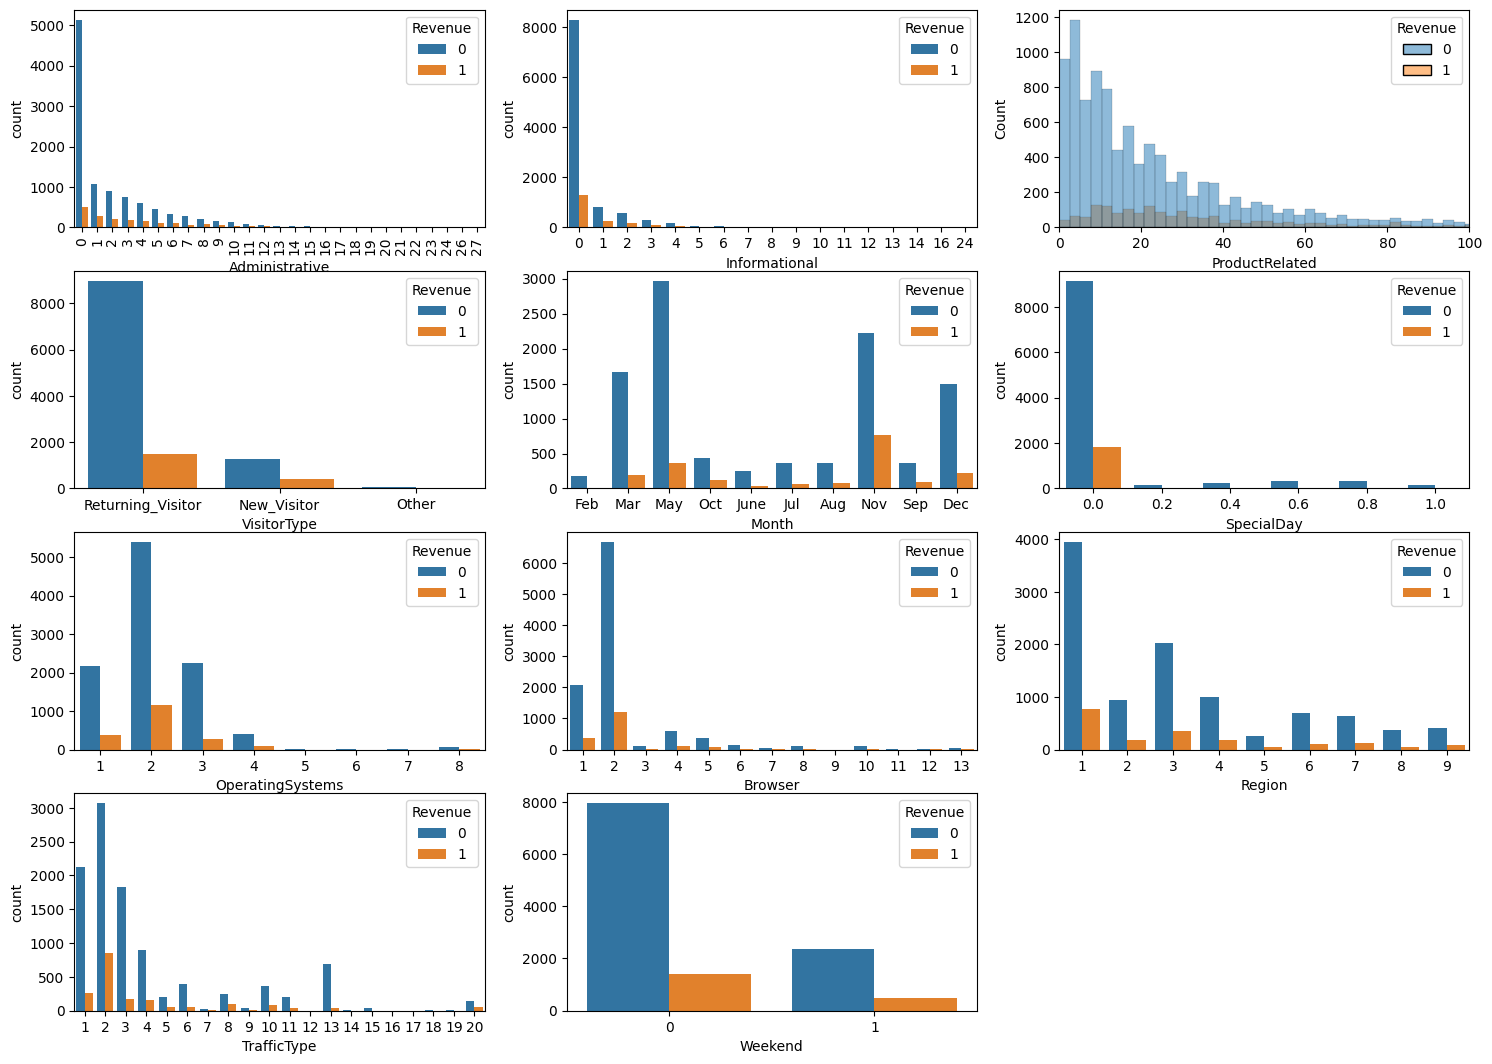

In [ ]:
plt.figure(figsize=(18,13))

plt.subplot(4,3,1)
sns.countplot(x='Administrative',hue="Revenue",data=sho)
plt.xticks(rotation=90)

plt.subplot(4,3,2)
sns.countplot(x='Informational',hue="Revenue",data=sho)

plt.subplot(4,3,3)
sns.histplot(x='ProductRelated',hue="Revenue",data=sho)
plt.xlim([0,100])

plt.subplot(4,3,4)
sns.countplot(x='VisitorType',hue="Revenue",data=sho)

plt.subplot(4,3,5)
sns.countplot(x='Month',hue="Revenue",data=sho)

plt.subplot(4,3,6)
sns.countplot(x='SpecialDay',hue="Revenue",data=sho)

plt.subplot(4,3,7)
sns.countplot(x='OperatingSystems',hue="Revenue",data=sho)

plt.subplot(4,3,8)
sns.countplot(x='Browser',hue="Revenue",data=sho)

plt.subplot(4,3,9)
sns.countplot(x='Region',hue="Revenue",data=sho)

plt.subplot(4,3,10)
sns.countplot(x='TrafficType',hue="Revenue",data=sho)

plt.subplot(4,3,11)
sns.countplot(x='Weekend',hue="Revenue",data=sho)

<Axes: xlabel='ProductRelated_Duration'>

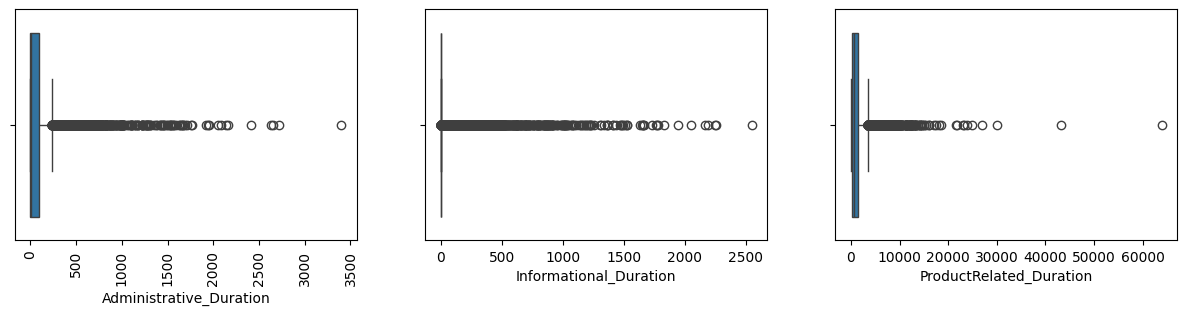

In [ ]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.boxplot(x='Administrative_Duration',data=sho)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(x='Informational_Duration',data=sho)

plt.subplot(1,3,3)
sns.boxplot(x='ProductRelated_Duration',data=sho)

In [ ]:
sho[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']].describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,12205.000000,12205.000000,12205.000000
mean,81.646331,34.825454,1206.982457
std,177.491845,141.424807,1919.601400
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,193.000000
50%,9.000000,0.000000,608.942857
75%,94.700000,0.000000,1477.154762
max,3398.750000,2549.375000,63973.522230


## **INSIGHTS :**


* As number of pages of all category (Administrative, Informational and Product Related) increases, number of visits decreases and mean time spent decreases.
* There are more Returning Visitors than New Visitors.
*	More customers visiting site are more in month of May but conversion rate is higher in month of November.
* Least customers visit on website on special day or close to special days.
* More customers visit from operating system 2, browser 2 and least operating system greater than 4.
* More customer are from Region 1 and is followed by region 3 and least customers are from region 5, 8 and 9.
* Customers visiting site are least on weekend and comparatively more on weekends.





# **CORRELATION ANALYSIS**

In [ ]:
sho_num = sho.drop(['Month','VisitorType','Weekend','TrafficType','Region','Browser','OperatingSystems'],axis=1)

<Axes: >

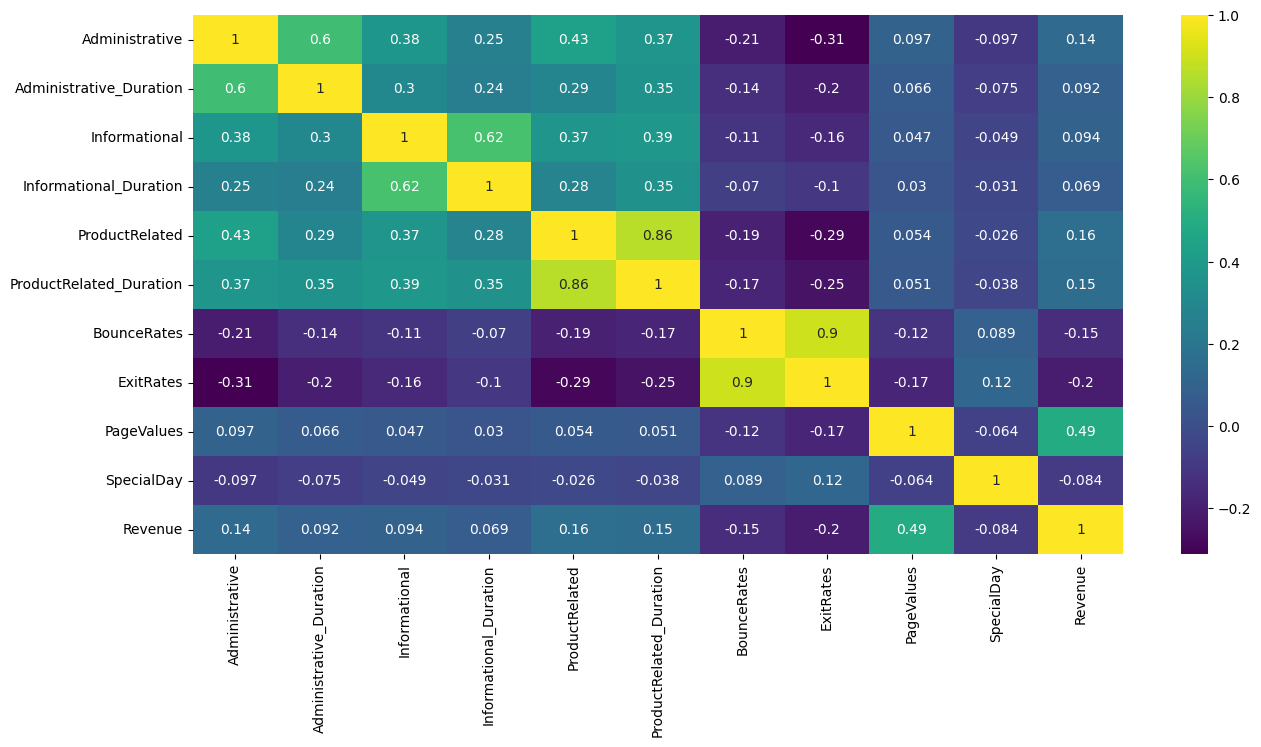

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(sho_num.corr(),annot=True,cmap='viridis')

## **INSIGHTS :**
* PageValues have positive correlation (0.49) with Revenue.
* ExitRates and BounceRates are highly positive correlted (0.9).
* ProductRelated page and duration are slightly negatively correlated (-0.29) and (-0.25) respectively.

# **CLASS DISTRIBUTION**

In [ ]:
sho['Revenue'].value_counts()

,count
Revenue,
0,10297
1,1908


 **Distribution of Revenue is not equal.**

## **Summary of page views, durations, and bounce/exit rates for each page category.**

In [ ]:
sho.groupby('Administrative')[['Administrative_Duration','BounceRates','ExitRates']].aggregate(['sum','mean']).reset_index().round(2).head(10)

Administrative Administrative_Duration         BounceRates       ExitRates  \
                                     sum    mean         sum  mean       sum   
0              0                    0.00    0.00      198.57  0.04    352.10   
1              1                57542.42   42.50       14.31  0.01     39.08   
2              2                96051.22   86.22        9.37  0.01     29.48   
3              3               106785.19  116.71        6.46  0.01     21.27   
4              4               113158.59  147.92        4.94  0.01     16.91   
5              5               103599.85  180.17        4.03  0.01     12.14   
6              6                87845.40  203.35        2.64  0.01      8.45   
7              7                68569.86  202.87        2.00  0.01      6.68   
8              8                74481.58  259.52        1.65  0.01      5.38   
9              9                60843.86  270.42        1.34  0.01      4.31   

         
   mean  
0  0.06  
1  0.03  
2  0.03  
3  0.02  
4  0.02  
5  0.02  
6  0.02  
7  0.02  
8  0.02  
9  0.02

## **INSIGHTS :**

**Average Bounce Rates and Exit Rates for Administrative Page 0 is highest and minimal for others.**

In [ ]:
sho.groupby('Informational')[['Informational_Duration','BounceRates','ExitRates']].aggregate(['sum','mean']).reset_index().head(10).round(2)

Informational Informational_Duration         BounceRates       ExitRates  \
                                   sum    mean         sum  mean       sum   
0             0                   0.00    0.00      226.50  0.02    442.85   
1             1               74662.63   71.72        9.71  0.01     26.37   
2             2              101842.67  139.89        5.77  0.01     17.80   
3             3               72942.84  191.95        2.87  0.01      8.68   
4             4               56452.36  254.29        1.82  0.01      4.94   
5             5               38958.30  393.52        0.71  0.01      2.13   
6             6               32941.06  422.32        0.59  0.01      1.57   
7             7               13880.87  385.58        0.35  0.01      0.85   
8             8                7054.45  503.89        0.07  0.01      0.23   
9             9               10579.41  705.29        0.14  0.01      0.32   

         
   mean  
0  0.05  
1  0.03  
2  0.02  
3  0.02  
4  0.02  
5  0.02  
6  0.02  
7  0.02  
8  0.02  
9  0.02

## **INSIGHTS :**

**Average Bounce Rates and Exit Rates for Informational Page 0 is highest and minimal for others.**

In [ ]:
sho.groupby('ProductRelated')[['ProductRelated_Duration','BounceRates','ExitRates']].aggregate(['sum','mean']).reset_index().head(15)

ProductRelated ProductRelated_Duration             BounceRates            \
                                      sum        mean         sum      mean   
0               0                0.000000    0.000000    3.730000  0.098158   
1               1            10424.392975   20.683319   83.753333  0.166177   
2               2            29131.730392   63.606398   21.318056  0.046546   
3               3            53939.257565  117.771305   15.567320  0.033990   
4               4            65886.657229  163.085785   11.205397  0.027736   
5               5            71662.278095  187.597587    9.826093  0.025723   
6               6            97063.365160  245.109508    7.565696  0.019105   
7               7           119062.458154  304.507566    7.277068  0.018611   
8               8           115396.114586  311.881391    6.139057  0.016592   
9               9           118569.215650  374.035381    5.248839  0.016558   
10             10           120851.876828  366.217809    4.388415  0.013298   
11             11           150623.382653  489.036957    3.766646  0.012229   
12             12           151840.408385  485.113126    4.105830  0.013118   
13             13           144965.520087  501.610796    3.554583  0.012300   
14             14           139294.525444  554.958269    2.902316  0.011563   

    ExitRates            
          sum      mean  
0    4.842929  0.127446  
1   90.562598  0.179688  
2   47.394016  0.103480  
3   35.617081  0.077767  
4   26.007805  0.064376  
5   22.024536  0.057656  
6   19.043886  0.048091  
7   17.673727  0.045201  
8   15.701042  0.042435  
9   13.053752  0.041179  
10  11.496407  0.034838  
11  10.126204  0.032877  
12  10.700551  0.034187  
13   9.217818  0.031896  
14   7.781567  0.031002

## **INSIGHTS :**

**Average Bounce Rates and Exit Rates for ProductRelated Page 1 is highest and minimal for others.**

## **Special Day distribution and its correlation with Revenue**

In [ ]:
sho.groupby('SpecialDay')[['BounceRates','ExitRates']].aggregate(['sum','mean']).reset_index().round(3)

SpecialDay BounceRates        ExitRates       
                     sum   mean       sum   mean
0        0.0     206.565  0.019   432.594  0.039
1        0.2       5.420  0.030     9.563  0.054
2        0.4       8.770  0.036    14.718  0.061
3        0.6      12.651  0.036    21.308  0.061
4        0.8      11.116  0.034    19.803  0.061
5        1.0       4.098  0.027     8.102  0.053

In [ ]:
pd.crosstab(sho['SpecialDay'],sho['Revenue'],margins=True,normalize='all').reset_index().round(3)

Revenue,SpecialDay,0,1,All
0,0.0,0.748,0.150,0.898
1,0.2,0.013,0.001,0.015
2,0.4,0.019,0.001,0.020
3,0.6,0.026,0.002,0.029
4,0.8,0.026,0.001,0.027
5,1.0,0.012,0.001,0.013
6,All,0.844,0.156,1.000


## **INSIGHTS :**

* **Bounce Rates and Exit rate decreases as special days comes closer.**
* **Though maximum customer visits on non-special days, but conversion rate is high on special days.**

# **BINARY FEATURE**

In [ ]:
sho['feat']=np.where(((sho['Administrative']>0) & (sho['Informational']>0)  & (sho['ProductRelated']>0)),1,0)

In [ ]:
sho.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,feat
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,0


In [ ]:
pd.crosstab(sho['feat'],sho['Revenue'],margins=True,normalize='all').reset_index().round(2)

Revenue,feat,0,1,All
0,0,0.71,0.11,0.82
1,1,0.13,0.04,0.18
2,All,0.84,0.16,1.00


In [ ]:
print("Conversion rate of user visiting any 1 page category is 18 % but conversion rate is ",round(4/18,2))
print("Conversion rate of user not visiting any page category is 82 % but conversion rate is ",round(11/82,2))

Conversion rate of user visiting any 1 page category is 18 % but conversion rate is  0.22
Conversion rate of user not visiting any page category is 82 % but conversion rate is  0.13


## **INSIGHTS :**

**There are 82% customers who do not visit on any page and customers at least visiting any 1 type of page is 18%, but customer visiting any 1 page have higher conversion rates.**

## **PAGEVALUES DISTRIBUTION**

<Axes: xlabel='PageValues', ylabel='Count'>

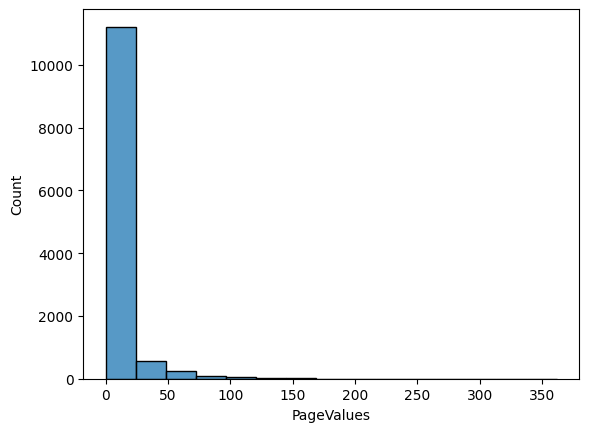

In [ ]:
sns.histplot(sho['PageValues'])

## **PAGEVALAUES RELATIONSHIP WITH TRAFFICTYPE**

In [ ]:
sho.groupby('TrafficType')['PageValues'].aggregate(['sum','mean']).sort_values(by='mean',ascending=False).head(10).round(2)

,sum,mean
TrafficType,,
20,2995.41,15.52
7,542.69,13.57
8,3533.74,10.30
2,32494.98,8.31
5,2005.25,7.71
4,7529.09,7.06
10,2793.70,6.21
6,2253.85,5.09
11,1251.95,5.07


## **INSIGHT :**

**Customer visit through Traffic type 20 which contribute to 15.5 % and is followed by Traffic type 7 (13.6%) and Traffic Type (10.3%).**

## **PAGEVALAUES RELATIONSHIP WITH VISITORTYPE**

In [ ]:
vs_pg=sho.groupby(['VisitorType'])['PageValues'].aggregate(['sum','mean']).reset_index().round(2)

In [ ]:
vs_pg

,VisitorType,sum,mean
0,New_Visitor,18248.09,10.78
1,Other,1546.30,19.09
2,Returning_Visitor,52820.16,5.06


**Page_Values for Other and New visitors are high average (19.09) and (10.78)**

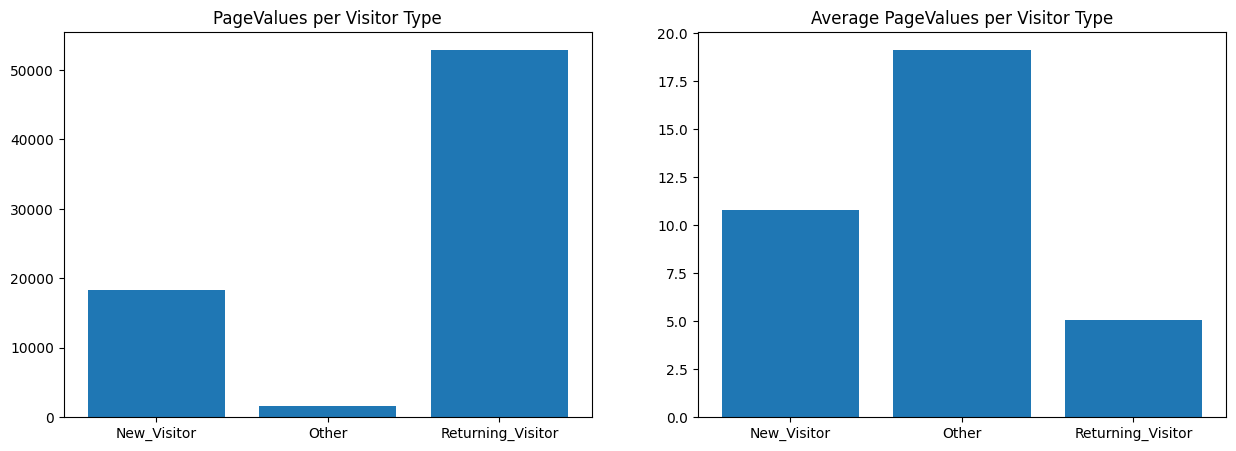

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.bar(vs_pg['VisitorType'],vs_pg['sum'])
plt.title('PageValues per Visitor Type')

plt.subplot(1,2,2)
plt.bar(vs_pg['VisitorType'],vs_pg['mean'])
plt.title('Average PageValues per Visitor Type')
plt.show()
#

## **INSIGHT :**
**Page Values for Other and New visitors are high average (19.09) and (10.78)**

## **PAGEVALAUES RELATIONSHIP WITH REGION**

In [ ]:
sho['Region'].value_counts()

,count
Region,
1,4714
3,2379
4,1171
2,1128
6,801
7,758
9,505
8,431
5,318


In [ ]:
rg_pg=sho.groupby(['Region'])['PageValues'].aggregate(['sum','mean']).reset_index().round(2)

In [ ]:
rg_pg

,Region,sum,mean
0,1,28212.26,5.98
1,2,6709.89,5.95
2,3,12842.43,5.40
3,4,6860.17,5.86
4,5,2941.75,9.25
5,6,3866.87,4.83
6,7,4763.54,6.28
7,8,1847.94,4.29
8,9,4569.69,9.05


<ipython-input-153-0a7e48d4d979>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rg_pg['Region'],y=rg_pg['sum'],palette='viridis')
<ipython-input-153-0a7e48d4d979>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rg_pg['Region'],y=rg_pg['mean'],palette='viridis')


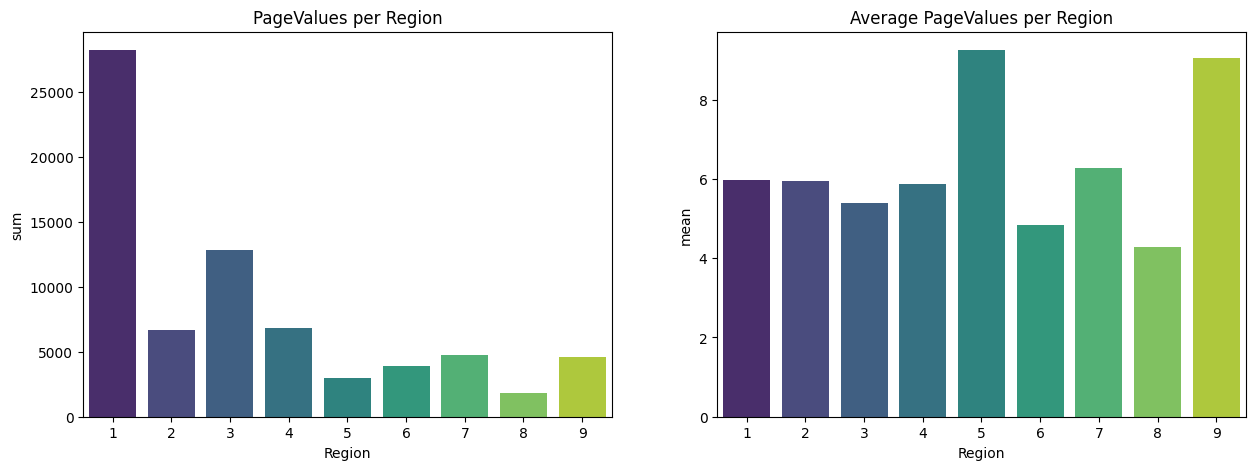

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=rg_pg['Region'],y=rg_pg['sum'],palette='viridis')
plt.title('PageValues per Region')

plt.subplot(1,2,2)
#plt.bar(rg_pg['Region'],rg_pg['mean'])
sns.barplot(x=rg_pg['Region'],y=rg_pg['mean'],palette='viridis')
plt.title('Average PageValues per Region')
plt.show()


## **INSIGHTS :**

**Average Page Values for Region 5 and Region 9 are much higher (9.25) and (9.05).**

## **USER SESSION LENGTH**

In [ ]:
sho['Duration']=sho['Administrative_Duration']+sho['Informational_Duration']+sho['ProductRelated_Duration']

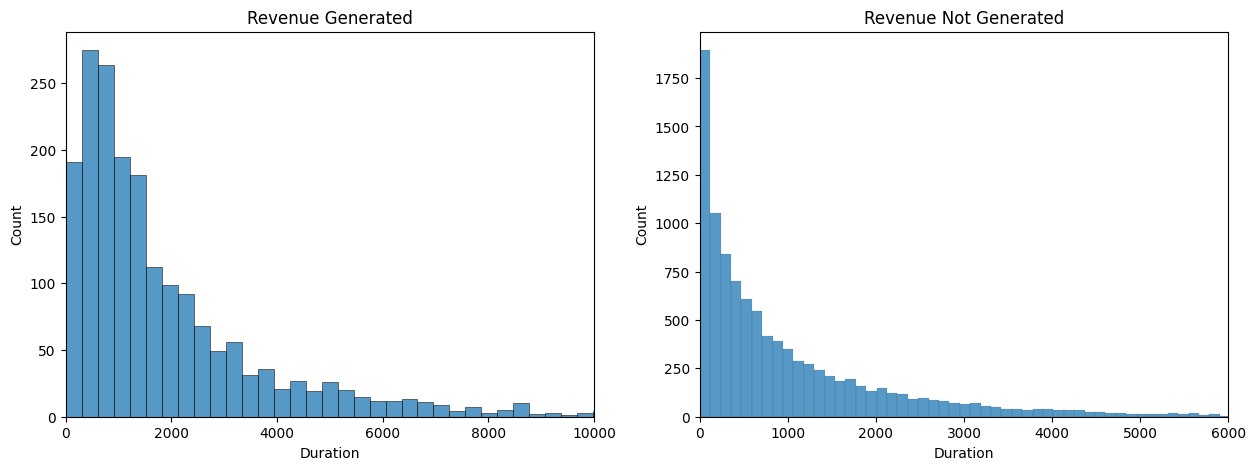

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(sho.loc[sho['Revenue']==True]['Duration'])
plt.xlim([0,10000])
plt.title('Revenue Generated')

plt.subplot(1,2,2)
sns.histplot(sho.loc[sho['Revenue']==False]['Duration'])
plt.xlim([0,6000])
plt.title('Revenue Not Generated')
plt.show()

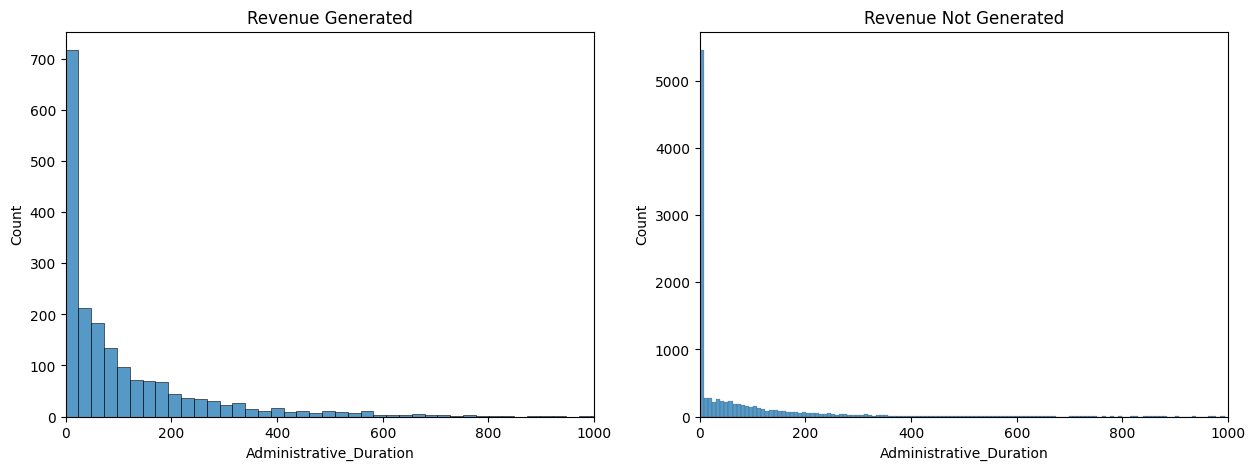

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(sho.loc[sho['Revenue']==True]['Administrative_Duration'])
plt.xlim([0,1000])
plt.title('Revenue Generated')

plt.subplot(1,2,2)
sns.histplot(sho.loc[sho['Revenue']==False]['Administrative_Duration'])
plt.xlim([0,1000])
plt.title('Revenue Not Generated')
plt.show()

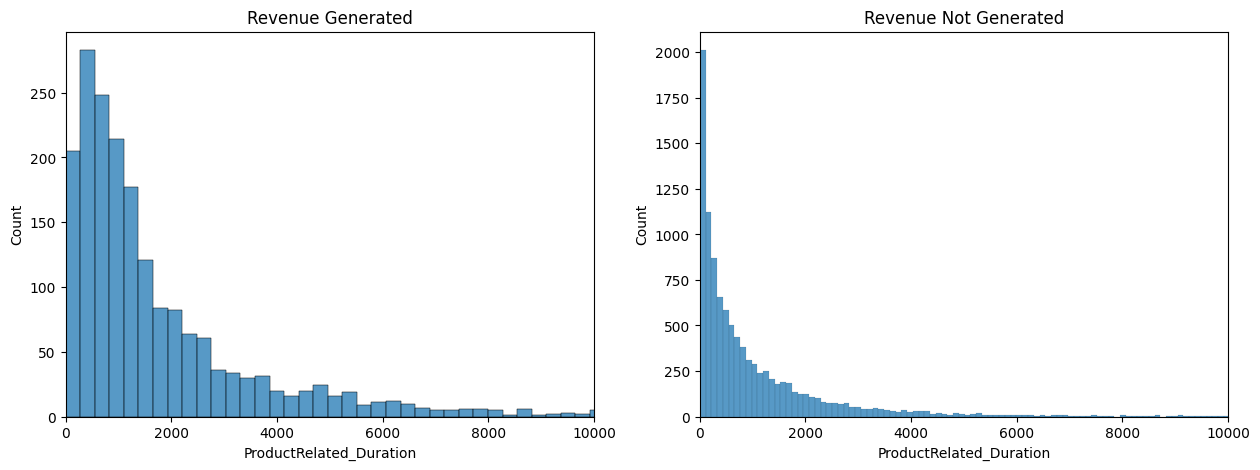

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(sho.loc[sho['Revenue']==True]['ProductRelated_Duration'])
plt.xlim([0,10000])
plt.title('Revenue Generated')

plt.subplot(1,2,2)
sns.histplot(sho.loc[sho['Revenue']==False]['ProductRelated_Duration'])
plt.xlim([0,10000])
plt.title('Revenue Not Generated')
plt.show()

In [ ]:
sho['Revenue'].sum()

1908

In [ ]:
sho['Revenue'].value_counts()

,count
Revenue,
0,10297
1,1908


## **INSIGHT :**

**Number of visitors decreases duration increases irrespective of revenue generated and Page category type**

## **VISITORTYPE GROUP**

In [ ]:
pd.crosstab(sho['VisitorType'],sho['Revenue'],margins=True,normalize='all').reset_index().round(2)

Revenue,VisitorType,0,1,All
0,New_Visitor,0.10,0.03,0.14
1,Other,0.01,0.00,0.01
2,Returning_Visitor,0.73,0.12,0.85
3,All,0.84,0.16,1.00


## **INSIGHT :**

**There are 85 % returning customers, but conversion rate of New_Visitors are higher than Returning_Visitors**

## **OPERATING SYSTEM GROUP**

In [ ]:
pd.crosstab(sho['OperatingSystems'],sho['Revenue'],margins=True,normalize='all').reset_index().round(3)

Revenue,OperatingSystems,0,1,All
0,1,0.178,0.031,0.209
1,2,0.441,0.095,0.536
2,3,0.185,0.022,0.207
3,4,0.032,0.007,0.039
4,5,0.000,0.000,0.000
5,6,0.001,0.000,0.002
6,7,0.000,0.000,0.001
7,8,0.005,0.001,0.006
8,All,0.844,0.156,1.000


In [ ]:
sho.loc[sho['OperatingSystems']>4].shape[0]/sho.shape[0]

0.00876689881196231

In [ ]:
sho.loc[sho['OperatingSystems']<5].shape[0]/sho.shape[0]

0.9912331011880376

In [ ]:
sho.loc[(sho['OperatingSystems']>4) & (sho['Revenue']==1)].shape[0]/sho.loc[sho['Revenue']==1].shape[0]

0.0110062893081761

**INSIGHT :**

**Operating systems 5,6,7,8 have least visit of Customers i.e which totally contribute only (0.01%) of total visits.**

## **REGION GROUP**

In [ ]:
pd.crosstab(sho['Region'],sho['Revenue'],margins=True,normalize='all').reset_index().round(3)

Revenue,Region,0,1,All
0,1,0.323,0.063,0.386
1,2,0.077,0.015,0.092
2,3,0.166,0.029,0.195
3,4,0.082,0.014,0.096
4,5,0.022,0.004,0.026
5,6,0.056,0.009,0.066
6,7,0.052,0.010,0.062
7,8,0.031,0.005,0.035
8,9,0.034,0.007,0.041
9,All,0.844,0.156,1.000


## **INSIGHTS :**

**Region 1 has highest number of visitors but conversion rate of Region 1 and Region 9 are higher.**

## **ENGAGEMENT PATTERNS**

In [ ]:
sho['TotalPages']=sho['Administrative']+sho['Informational']+sho['ProductRelated']

In [ ]:
sho.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,feat,Duration,TotalPages
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,0,0,0,0.000000,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,0,0,0,64.000000,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,0,0,0,0.000000,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,0,0,0,2.666667,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,1,0,0,627.500000,10


In [ ]:
sho.groupby("TrafficType")[['BounceRates','ExitRates']].aggregate(['sum','mean']).reset_index().round(2)

TrafficType BounceRates       ExitRates      
                       sum  mean       sum  mean
0            1       66.68  0.03    123.94  0.05
1            2       32.68  0.01    102.87  0.03
2            3       60.56  0.03    109.40  0.05
3            4       16.78  0.02     38.05  0.04
4            5        2.46  0.01      7.72  0.03
5            6        9.61  0.02     19.96  0.05
6            7        0.31  0.01      0.99  0.02
7            8        3.94  0.01     10.17  0.03
8            9        0.91  0.02      1.71  0.04
9           10        7.48  0.02     17.06  0.04
10          11        5.49  0.02     10.81  0.04
11          12        0.00  0.00      0.07  0.07
12          13       33.95  0.05     49.91  0.07
13          14        0.03  0.00      0.31  0.02
14          15        2.46  0.07      3.21  0.09
15          16        0.00  0.00      0.05  0.02
16          17        0.05  0.05      0.08  0.08
17          18        0.33  0.03      0.53  0.05
18          19        0.44  0.03      0.85  0.05
19          20        4.45  0.02      8.41  0.04

## **INSIGHTS :**

**Bounce rate and Exit rates are almost same for all Traffic Type.**

In [ ]:
sho.groupby("TrafficType")[['Duration','TotalPages']].aggregate(['sum','mean']).reset_index().round(2)

TrafficType    Duration          TotalPages       
                       sum     mean        sum   mean
0            1  3243114.17  1358.09      83767  35.08
1            2  6335016.11  1619.79     163382  41.77
2            3  1987107.67   987.14      57226  28.43
3            4  1170365.87  1097.90      33535  31.46
4            5   225769.93   868.35       5679  21.84
5            6   550198.58  1241.98      14249  32.16
6            7    46023.99  1150.60       1304  32.60
7            8   421688.90  1229.41      10118  29.50
8            9    27092.09   660.78        714  17.41
9           10   614354.88  1365.23      16088  35.75
10          11   242494.91   981.76       6754  27.34
11          12       15.00    15.00          3   3.00
12          13  1001924.19  1376.27      25896  35.57
13          14    60674.93  4667.30       1106  85.08
14          15    23212.28   627.36        680  18.38
15          16     2697.57   899.19         55  18.33
16          17       60.00    60.00          4   4.00
17          18     6019.66   601.97        163  16.30
18          19    28509.18  1677.01        703  41.35
19          20   166419.14   862.28       4446  23.04

## **INSIGHTS :**

**Average total duration and average page visited  is highest for TrafficType 14 and least for TrafficType 12 and 17**


# **EXTRA**

## **Month wise Analysis**

In [ ]:
sho.groupby(['Month'])['Duration'].aggregate(['sum','mean','count']).reset_index().round(2).sort_values(by='mean',ascending=False)

,Month,sum,mean,count
7,Nov,5675112.58,1903.12,2982
0,Aug,612645.34,1414.89,433
9,Sep,626505.79,1398.45,448
3,Jul,579743.48,1342.00,432
4,June,372372.00,1306.57,285
8,Oct,703589.59,1281.58,549
1,Dec,2121054.80,1243.29,1706
6,May,3628168.22,1089.87,3329
5,Mar,1743357.02,937.29,1860
2,Feb,90210.22,498.40,181


In [ ]:
crss=pd.crosstab(sho['Month'],sho['Revenue'])
crss.div(crss.sum(axis=1), axis=0)

Revenue,0,1
Month,,
Aug,0.824480,0.175520
Dec,0.873388,0.126612
Feb,0.983425,0.016575
Jul,0.847222,0.152778
June,0.898246,0.101754
Mar,0.896774,0.103226
May,0.890357,0.109643
Nov,0.745137,0.254863
Oct,0.790528,0.209472


## **INSIGHT :**

**Observing both table, average duration of page is highest in month of November and is followed by August. But conversion rate is highest in August.**

## **PageValue Effect on Revenue**

In [ ]:
sho.loc[sho['PageValues']==0.0]['Revenue'].value_counts(normalize=True)

,proportion
Revenue,
0,0.96095
1,0.03905


In [ ]:
sho.loc[sho['PageValues']!=0.0]['Revenue'].value_counts(normalize=True)

,proportion
Revenue,
1,0.56337
0,0.43663


In [ ]:
sho.loc[sho['PageValues']>10]['Revenue'].value_counts(normalize=True)

,proportion
Revenue,
1,0.655938
0,0.344062


In [ ]:
sho.loc[sho['PageValues']>100]['Revenue'].value_counts(normalize=True)

,proportion
Revenue,
1,0.865854
0,0.134146


In [ ]:
sho.loc[sho['PageValues']>200]['Revenue'].value_counts(normalize=True)

,proportion
Revenue,
1,0.875
0,0.125


## **INSIGHT :**
**As PageValue changes from 0 to non-zero, conversion rate changes rapidly (from 3% to 43%).It increases further as PageValues increases.**

In [ ]:
sho[['Administrative','Informational','ProductRelated']].aggregate(['min','max','mean']).reset_index()

,index,Administrative,Informational,ProductRelated
0,min,0.000000,0.000000,0.000000
1,max,27.000000,24.000000,705.000000
2,mean,2.338878,0.508726,32.045637


## **INSIGHT :**
**Mean Average duration spent is higher on Informational Page type and least for Administrative Page category.**

In [ ]:
sho.groupby("OperatingSystems")[['BounceRates','ExitRates']].aggregate(['min','max','mean']).reset_index().round(2)

OperatingSystems BounceRates             ExitRates            
                           min   max  mean       min   max  mean
0                1         0.0  0.20  0.02      0.00  0.20  0.04
1                2         0.0  0.20  0.01      0.00  0.20  0.04
2                3         0.0  0.20  0.03      0.00  0.20  0.05
3                4         0.0  0.20  0.01      0.00  0.20  0.03
4                5         0.0  0.05  0.01      0.01  0.09  0.04
5                6         0.0  0.20  0.04      0.00  0.20  0.05
6                7         0.0  0.20  0.04      0.02  0.20  0.07
7                8         0.0  0.20  0.02      0.00  0.20  0.04

## **INSIGHTS :**
**Operating Systems 5,6,7,8 have high average bounce rates and exit rates.**

In [ ]:
sho["Region"].value_counts()

,count
Region,
1,4714
3,2379
4,1171
2,1128
6,801
7,758
9,505
8,431
5,318


#                                 **CAMPAIGN DATASET**

In [ ]:
cam.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


## **Shape of Dataset**

In [ ]:
cam.shape

(2239, 27)

In [ ]:
cam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

## **Pre-Processing**

In [ ]:
cam['Income(in $)']=cam['Income'].str.replace('$','')

In [ ]:
import re

In [ ]:
def convert(x):
  return float(re.sub(r',', '',x))

In [ ]:
cam['Income(in $)'] = cam['Income(in $)'].apply(convert)

In [ ]:
cam.drop('Income',axis=1,inplace=True)

In [ ]:
cam['Dt_Customer'] = pd.to_datetime(cam['Dt_Customer'])

<ipython-input-188-5d87ea841b12>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cam['Dt_Customer'] = pd.to_datetime(cam['Dt_Customer'])


In [ ]:
cam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Year_Birth           2239 non-null   int64         
 2   Education            2239 non-null   object        
 3   Marital_Status       2239 non-null   object        
 4   Kidhome              2239 non-null   int64         
 5   Teenhome             2239 non-null   int64         
 6   Dt_Customer          2239 non-null   datetime64[ns]
 7   Recency              2239 non-null   int64         
 8   MntWines             2239 non-null   int64         
 9   MntFruits            2239 non-null   int64         
 10  MntMeatProducts      2239 non-null   int64         
 11  MntFishProducts      2239 non-null   int64         
 12  MntSweetProducts     2239 non-null   int64         
 13  MntGoldProds         2239 non-nul

In [ ]:
cam.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


In [ ]:
cam.duplicated().sum()

0

In [ ]:
cam_num = cam.select_dtypes(include=['number'])

In [ ]:
#sns.pairplot(cam)

### **Is income of customers dependent on their education**

In [ ]:
cam.groupby('Education')['Income(in $)'].aggregate(['min','max','mean','sum']).reset_index().round(2)

,Education,min,max,mean,sum
0,2n Cycle,7500.0,96547.0,47633.19,9526638.0
1,Basic,7500.0,34445.0,20306.26,1096538.0
2,Graduation,1730.0,157146.0,52169.75,58169271.0
3,Master,6560.0,157733.0,52917.53,19314900.0
4,PhD,4023.0,162397.0,56145.31,27005896.0


 **Through Data, we can see that mean Income of different of different Education Group. But we will verify it with hypothesis testing.**

**Null  Hypothesis (H0):** Income of customer is not dependent on education.

 **Alternate  Hypothesis (H1):** Income of customer is dependent on education.

In [ ]:
##cam['Income'].aggregate(['min','max','mean'])
cam['Education'].value_counts()

,count
Education,
Graduation,1126
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
from scipy.stats import f_oneway

In [ ]:
phdi=cam.loc[cam['Education']=='PhD']['Income(in $)']

In [ ]:
gradi=cam.loc[cam['Education']=='Graduation']['Income(in $)']

In [ ]:
masi=cam.loc[cam['Education']=='Master']['Income(in $)']

In [ ]:
cyci=cam.loc[cam['Education']=='2n Cycle']['Income(in $)']

In [ ]:
basi=cam.loc[cam['Education']=='Basic']['Income(in $)']

In [ ]:
phdi.fillna(phdi.mean(),inplace=True)
gradi.fillna(gradi.mean(),inplace=True)
masi.fillna(masi.mean(),inplace=True)
cyci.fillna(cyci.mean(),inplace=True)
basi.fillna(basi.mean(),inplace=True)

<ipython-input-202-1bcb773e2573>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phdi.fillna(phdi.mean(),inplace=True)
<ipython-input-202-1bcb773e2573>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gradi.fillna(gradi.mean(),inplace=True)
<ipython-input-202-1bcb773e2573>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masi.fillna(masi.mean(),inplace=True)
<ipython-input-202-1bcb773e2573>:4: SettingWithCopyWarning: 
A value is tryin

In [ ]:
f_oneway(phdi,gradi,masi,cyci,basi)

F_onewayResult(statistic=38.89629922219753, pvalue=1.611667076286649e-31)

 **As p-value if much smaller then significance level (often 0.05), we reject null hypothesis and support alternate hypothesis.**

## **It concludes that income of customers is dependent on their education.**

<Axes: xlabel='Education', ylabel='Income(in $)'>

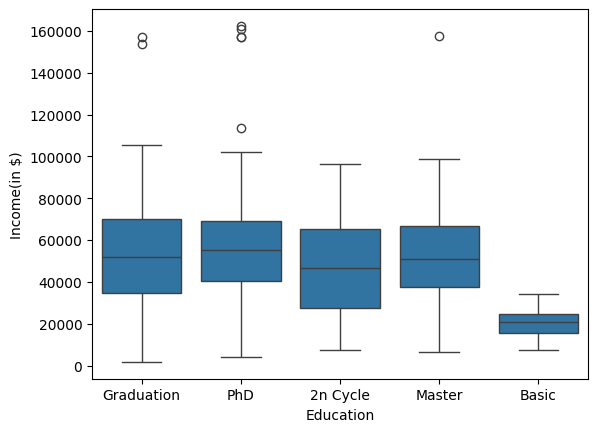

In [ ]:
sns.boxplot(x='Education',y='Income(in $)',data=cam)

## **Question : Do higher income people spend more (take in account spending in all categories together)**

In [ ]:
cam['Inc_Br']=cam['Income(in $)'].apply(lambda x: 'Low' if x<cam['Income(in $)'].median() else 'High')

In [ ]:
cam['Total_Spend']=cam['MntWines']+cam['MntFruits']+cam['MntMeatProducts']+cam['MntFishProducts']+cam['MntSweetProducts']+cam['MntGoldProds']

In [ ]:
cam.groupby('Inc_Br')['Total_Spend'].aggregate(['mean','sum']).reset_index().round(2)

,Inc_Br,mean,sum
0,High,1045.91,1183968
1,Low,156.24,172958


**Through Data, we can observe that mean Total Spend of Higher income people is much higher then low income people. But we will confirm it through Hypothesis Testing.**

<Axes: xlabel='Income(in $)', ylabel='Count'>

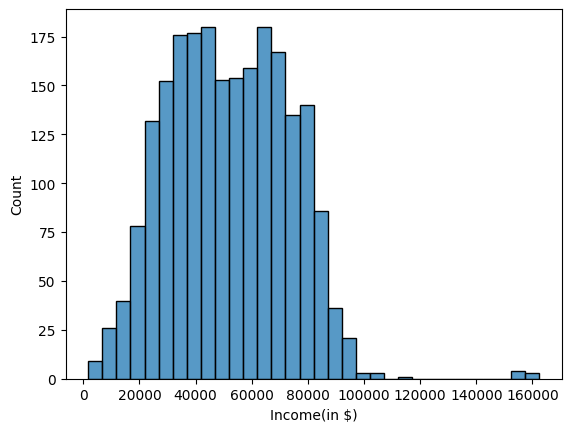

In [ ]:
sns.histplot(cam['Income(in $)'])

**Null Hypothesis(H0) :** Total Spend of lower income people and higher income people are same.

**Alternate Hypothesis(Ha) :** Total Spend of lower income people are lower then higher income people.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
s1=cam.loc[cam['Inc_Br']=="Low"]['Total_Spend']

In [ ]:
s2=cam.loc[cam['Inc_Br']=="High"]['Total_Spend']

In [ ]:
ttest_ind(s1,s2,alternative='less')

TtestResult(statistic=-51.8359751041255, pvalue=0.0, df=2237.0)

**As p-value is less then significance level (often 0.05), we reject null hypothesis and support Alternate Hypothesis.**

### **We conclude that, higher income people spend more than lower income people.**

In [ ]:
from statsmodels.stats import weightstats as stests

# **Question : Do couples spend more or less money on wine than people living alone ?**

In [ ]:
s3=cam.loc[(cam['Marital_Status']=='Married')|(cam['Marital_Status']=='Together')]['MntWines']

In [ ]:
s4=cam.loc[(cam['Marital_Status']=='Single')|(cam['Marital_Status']=='Divorced') | (cam['Marital_Status']=='Widow')|
           (cam['Marital_Status']=='Alone') |(cam['Marital_Status']=='YOLO')|(cam['Marital_Status']=='Absurd') ]['MntWines']

In [ ]:
print ("Mean spend of people living alone are : ",s4.mean().round(2))
print ("Mean spend of people living together are : ",s3.mean().round(2))

Mean spend of people living alone are :  306.67
Mean spend of people living together are :  302.63


**Through data, we can see there mean spend for both groups are approximately same. But we will confirm it through hypothesis testing.**

**Null Hypothesis (H0) :** Couples spent on wine is same as spent by people living alone.

**Alternate Hypothesis (H0) :** Couples spent on wine is not same as spent by people living alone.

In [ ]:
ttest_ind(s3,s4,alternative='two-sided')

TtestResult(statistic=-0.2712259990062464, pvalue=0.7862422428083654, df=2237.0)

**As p-value is greater then significance level (often 0.05), we fail to reject null hypothesis.**

### **We conclude that, Money spent by people living alone and couples on wine are same.**

## **Question : Are people with lower income are more attracted towards campaign or simply put accept more campaigns.**

In [ ]:
cam['Acc']=np.where(((cam['AcceptedCmp1']==1)|(cam['AcceptedCmp2']==1)|(cam['AcceptedCmp3']==1)|(cam['AcceptedCmp4']==1)|(cam['AcceptedCmp5']==1)),1,0)

In [ ]:
cam.loc[cam['Inc_Br']=="Low"]['Acc'].value_counts()

,count
Acc,
0,992
1,115


**According to data, lower income people are less attracted towards campaign. We should confirm by hypothesis testing.**

**Null Hypothesis :** Lower income people are equally attracted towards campaign.

**Alternate Hypothesis :** Lower income people are not equally attracted towards campaign.

In [ ]:
s5=cam.loc[(cam['Acc']==1) & (cam['Inc_Br']=="Low")]['Acc']
s6=cam.loc[(cam['Acc']==0) & (cam['Inc_Br']=="Low")]['Acc']

In [ ]:
ttest_ind(s5,s6,alternative='less')

TtestResult(statistic=inf, pvalue=1.0, df=1105.0)

**As p-value is much greater than significance level , we reject null hypothesis and support alternate hypothesis.**

## **We can conclude that lower income people are less attracted towards campaign.**

## **SHOPPING DATASET INSIGHTS:**

•	As number of pages of all category (Administrative, Informational and Product Related) increases, number of visits decreases and mean time spent decreases.

•	Bounce rates and exit rates of all page category decreases as number of page visit increases

•	There are more Returning Visitors than New Visitors.

•	More customers visiting site are more in month of May but conversion rate is higher in month of November.

•	Least customers visit on website on special day or close to special days.

•	More customers visit from operating system 2, browser 2 and least operating system greater than 4.

•	More customer are from Region 1 and is followed by region 3 and least customers are from region 5, 8 and 9.

•	Customers visiting site are least on weekend and comparatively more on weekends.

•	Page Values have positive correlation (0.49) with Revenue.

•	Exit Rates and Bounce Rates are highly positive correlated (0.9).

•	Product Related page and duration are slightly negatively correlated (-0.29) and (-0.25) respectively.

•	Average Bounce Rates and Exit Rates for Administrative Page 0 is highest and minimal for others.

•	Average Bounce Rates and Exit Rates for Informational Page 0 is highest and minimal for others.

•	Average Bounce Rates and Exit Rates for Informational Page 0 is highest and minimal for others.

•	Bounce Rates and Exit rate decreases as special days comes closer.

•	Though maximum customer visits on non-special days, but conversion rate is high on special days.

•	There are 82% customers who do not visit on any page category and customers at least visiting any 1 page category is 18%, but customer visiting any 1 page have higher conversion rates.

•	Customer visit through Traffic type 20 which contribute to 15.5 % of Page Values and is followed by Traffic type-7 (13.6%) and Traffic Type (10.3%).

•	Page Values for Other and New visitors are high average (19.09) and (10.78)

•	Average Page Values for Region 5 and Region 9 are much higher (9.25) and (9.05) than other region.

•	There are 85 % returning customers, but conversion rate of New Visitors are higher than Returning Visitors.

•	Operating systems 5,6,7,8 have least visit of Customers i.e which totally contribute only (0.01%) of total visits.

•	Region 1 has highest number of visitors but conversion rate of Region 1 and Region 9 are higher.

•	Bounce rate and Exit rates are almost same for all Traffic Type.

•	Average total duration and average page visited is highest for Traffic Type 14 and least for Traffic Type 12 and 17.

•	Observing both table, average duration of page is highest in month of November and is followed by August. But conversion rate is highest in August.

•	As Page Value changes from 0 to non-zero, conversion rate changes rapidly (from 3% to 43%).It increases further as Page Values increases.

•	Mean Average duration spent is higher on Informational Page type and least for Administrative Page category.

•	Operating Systems 5,6,7,8 have high average bounce rates and exit rates.


## **CAMPAIGN DATASET INSIGHTS :**

1.	Income of customers is dependent on their education.
2.	Higher income people spend more than lower income people.
3.	Money spent by people living alone and couples on wine are same.
4.	Lower income people are less attracted towards campaign.


## **ACTIONABLE RECOMMENDATIONS:**

1.	Number of Page visits decreases as number of page increases, also bounce rate and exit rate decreases, clearly specifies website might be facing poor user experience on initial pages of website. Company should increase more engagement on initial page by adding high - Quality Content, simplify navigations etc.
2.	Returning customers are high then new visitors but conversion rate of new visitors are high. So along with retention of customers, company should focus on marketing and advertising. To increase conversion rate of returning customers, company should provide some offers, discount to its old and loyal customers.
3.	There are less visitors from Region 5, 8, 9. If specific region are facing issue, company should focus on smooth delivery and transportation in this region as late delivery might be the one of the main reason.
4.	Page Value for returning customers are low. Company should Enhance User Experience, Improve Content Quality and Relevance.
5.	Operating Systems 5,6,7,8 have least customer visits and bounce rate, exit rates are high for this operating systems. This systems might have high technical glitches or slow loading time. Company should solve this technical issue at earliest.
6.	Traffic Type 12 and Traffic Type 17 have least visits. Company should check for technical issue and resolve if any.
7.	In month of November, duration is higher but conversion rate is low. Company should check for items to be needed by users according to that season.
